# Pandas Data Analysis Exercise

Download [Chipotle Dataset](https://github.com/subashgandyer/datasets/blob/main/chipotle.tsv) to walkthrough this exercise

### Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

### Read the dataset into a dataframe

In [13]:
from pathlib import Path

In [14]:
Path.cwd()

WindowsPath('c:/Proyectos/George Brown Projects/TA/ML 1/Module 2 - Pandas')

In [6]:
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Display the first few samples

In [17]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Find out how many number of samples in the dataset

In [15]:
chipo.shape

(4622, 5)

In [5]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Find out how many number of features in the dataset

In [6]:
chipo.shape[1]

5

### What are the feature names in the dataset

In [7]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### How is the dataset indexed?

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Which was the most-ordered item? 

### Long way: Groupby item_name, Sum, Sort on quantity, Display in descending order

In [9]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Concise Pythonic way solution

In [11]:
chipo.groupby('item_name').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)[:1]

,quantity
item_name,
Chicken Bowl,761


### For the most-ordered item, how many items were ordered?

In [13]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)['quantity']

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

### What was the most ordered item in the choice_description column?

In [14]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### How many items were orderd in total?

In [15]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

### Convert the item price into a float

### Long and slow way: Writing a function to convert item price to float and then apply it over dataframe

#### Check the item price type

In [16]:
chipo.item_price.dtype

dtype('O')

#### Create a function to convert the item price into float

In [31]:
def float_converter(x):
    return float(x[1:-1])

In [32]:
chipo.item_price = chipo.item_price.apply(float_converter)

In [33]:
chipo.item_price.dtype

dtype('float64')

#### Reset the converstion back to string to try lambda function conversion

In [ ]:
chipo = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv", sep="\t")
chipo

#### Create a lambda function and change the type of item price

In [20]:
float_converter = lambda x: float(x[1:-1])
chipo.item_price_float_lam = chipo.item_price.apply(float_converter)

<ipython-input-20-eaaff48cfe7d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  chipo.item_price_float_lam = chipo.item_price.apply(float_converter)


#### Check the item price type

In [21]:
chipo.item_price_float_lam.dtype

dtype('float64')

### Complex

In [22]:
chipo.item_price.str.slice(1).astype(float)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### How much was the revenue for the period in the dataset?

In [34]:
revenue = (chipo['quantity']* chipo['item_price']).sum()
revenue

39237.02

### How many orders were made in the period?

In [35]:
orders = chipo.order_id.value_counts().count()
orders

1834

In [36]:
chipo.order_id.nunique()

1834

### What is the average revenue amount per order?

In [37]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.39423118865867

In [ ]:
chipo.groupby(by=['order_id']).sum().mean()['revenue']

In [ ]:
chipo.head()

In [ ]:
chipo['item_price'] = chipo['item_price'].str.slice(1).astype(float)

In [ ]:
chipo['revenue'] = chipo['item_price'] * chipo['quantity']

In [ ]:
chipo.head()

In [ ]:
order_group = chipo.groupby('order_id').sum()

In [ ]:
order_group

In [ ]:
order_group.mean()

In [ ]:
order_group.mean()['revenue']

### How many different items are sold?

In [38]:
chipo.item_name.value_counts().count()

50

In [ ]:
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### How many products cost more than $10

In [ ]:
# clean the item_price column and transform it in a float
# prices = [float(value[1 : -1]) for value in chipo.item_price]
prices = chipo.item_price.str.slice(1).astype(float)

# reassign the column with the cleaned prices
chipo.item_price = prices

# delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity','choice_description'])

# chipo_filtered

# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
chipo_one_prod

# chipo_one_prod[chipo_one_prod['item_price']>10].item_name.nunique()
# chipo_one_prod[chipo_one_prod['item_price']>10]



# chipo.query('price_per_item > 10').item_name.nunique()

In [ ]:
chipo['item_price'] = chipo.item_price.str.slice(1).astype(float)

In [39]:
(chipo['item_price'] > 10).sum()

1130

In [40]:
products = chipo.groupby('item_name').agg({'item_price': 'max'})
products.head()

,item_price
item_name,
6 Pack Soft Drink,12.98
Barbacoa Bowl,11.75
Barbacoa Burrito,11.75
Barbacoa Crispy Tacos,18.50
Barbacoa Salad Bowl,11.89


In [41]:
(products.item_price > 10).sum()

31

### Sort by item name

In [42]:
chipo.item_name.sort_values()

# OR

chipo.sort_values(by = "item_name")

,order_id,quantity,item_name,choice_description,item_price,revenue
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,25.96
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49
...,...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75,8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49,8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25


### What is the quantity of the most expensive order?

In [ ]:
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


In [44]:
chipo.item_price.idxmax()

3598

In [45]:
chipo.loc[3598, :]

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
revenue                                     663.75
Name: 3598, dtype: object

### How many times a Veggie Salad Bowl ordered?

In [46]:
chipo_salad = chipo[chipo.item_name == "Veggie Salad Bowl"]

len(chipo_salad)

18

In [47]:
chipo[chipo.item_name == "Veggie Salad Bowl"].quantity.sum()

18

### How many items more than one canned soda is ordered?

In [48]:
chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]
len(chipo_drink_steak_bowl)

20

In [49]:
chipo[chipo.item_name == "Canned Soda"]

,order_id,quantity,item_name,choice_description,item_price,revenue
18,9,2,Canned Soda,[Sprite],2.18,4.36
28,14,1,Canned Soda,[Dr. Pepper],1.09,1.09
51,23,2,Canned Soda,[Mountain Dew],2.18,4.36
53,24,1,Canned Soda,[Sprite],1.09,1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09,1.09
...,...,...,...,...,...,...
3897,1562,1,Canned Soda,[Mountain Dew],1.09,1.09
3926,1575,1,Canned Soda,[Dr. Pepper],1.09,1.09
3936,1578,1,Canned Soda,[Diet Dr. Pepper],1.09,1.09
4008,1604,1,Canned Soda,[Diet Coke],1.09,1.09


In [50]:
chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]

,order_id,quantity,item_name,choice_description,item_price,revenue
18,9,2,Canned Soda,[Sprite],2.18,4.36
51,23,2,Canned Soda,[Mountain Dew],2.18,4.36
162,73,2,Canned Soda,[Diet Coke],2.18,4.36
171,76,2,Canned Soda,[Diet Dr. Pepper],2.18,4.36
350,150,2,Canned Soda,[Diet Coke],2.18,4.36
352,151,2,Canned Soda,[Coca Cola],2.18,4.36
698,287,2,Canned Soda,[Coca Cola],2.18,4.36
700,288,2,Canned Soda,[Coca Cola],2.18,4.36
909,376,2,Canned Soda,[Mountain Dew],2.18,4.36
1091,450,2,Canned Soda,[Dr. Pepper],2.18,4.36


In [51]:
chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)].count()

order_id              20
quantity              20
item_name             20
choice_description    20
item_price            20
revenue               20
dtype: int64

In [52]:
(chipo[chipo.item_name == "Canned Soda"].quantity > 1).sum()

20

### Create a Histogram of top items bought

In [53]:
top5 = chipo.groupby('item_name').agg({"quantity": 'sum'}).sort_values("quantity", ascending=False)[:5]
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


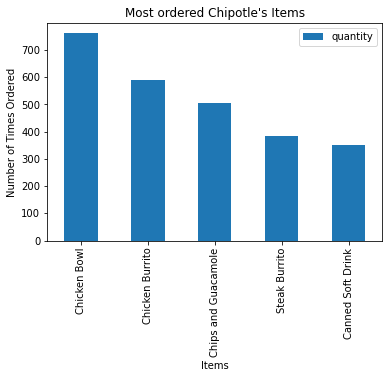

In [54]:
top5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')
plt.show()

### Seaborn plot

In [55]:
import seaborn as sns

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

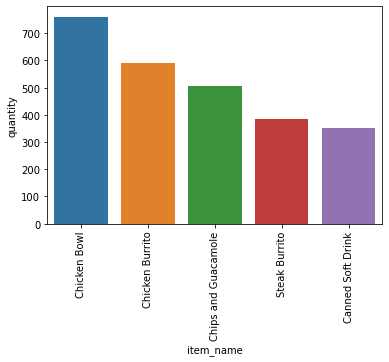

In [56]:
sns.barplot(
    x="item_name",
    y="quantity",
    data=top5.reset_index()
)
plt.xticks(rotation='vertical')

In [59]:
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Create a Scatterplot to show the number of items ordered with respect to item price

(0.0, 36.7)

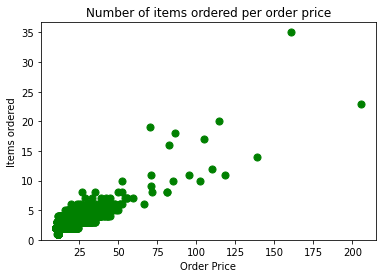

In [61]:
# create a list of prices
# chipo.item_price_corrected = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space
chipo['item_price_corrected'] = chipo.item_price.str.slice(1).astype(float) # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price_corrected, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

<AxesSubplot:xlabel='item_price_corrected', ylabel='quantity'>

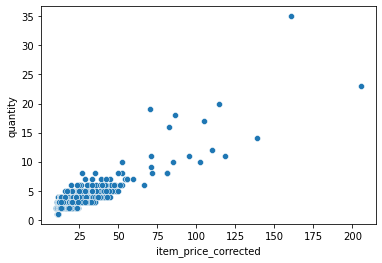

In [62]:
sns.scatterplot(x=orders.item_price_corrected, y=orders.quantity, data=chipo)